# Machine Learning

***

```sh
$ conda install tensorflow
```


https://keras.io/

## Packages

***

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Neural networks.
import tensorflow.keras as keras

In [2]:
# Horrible hack from: https://stackoverflow.com/a/53014308
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Single Neuron

***

![Neuron](img/neuron.svg)

## Single Input

***

![Single Input Neuron](img/neuron-single-input.svg)

$$y = mx + c$$

$$ \phi (x) = x $$

$$ \phi (w_1 x_1 + w_0 (1)) = w_1  x_1 + w_0 $$

In [3]:
# Identity activation function.
def identity(x):
    return x

In [4]:
# Firing a neuron.
def fire_neuron(x, w, phi):
    return phi(np.sum(x * w))

In [5]:
# Our x values - always has to have 1.0 at index 0.
x = np.array([1.0, 4.0])

# Our weights.
w = np.array([2.0, 3.0])

x, w

(array([1., 4.]), array([2., 3.]))

In [6]:
fire_neuron(x, w, identity)

14.0

## Data

***

In [7]:
# Real-world input values.
data_in = np.arange(1.0, 13.0, 1.0)

data_in

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [8]:
# Real-world output values.
data_out = 4.0 * data_in + np.random.normal(0.0, 1.0, len(data_in))

data_out

array([ 3.45992002,  7.88508696, 12.03522072, 16.2883924 , 19.90914972,
       23.01996606, 27.7314841 , 31.12450348, 36.71428972, 40.62029452,
       45.60554043, 48.61747311])

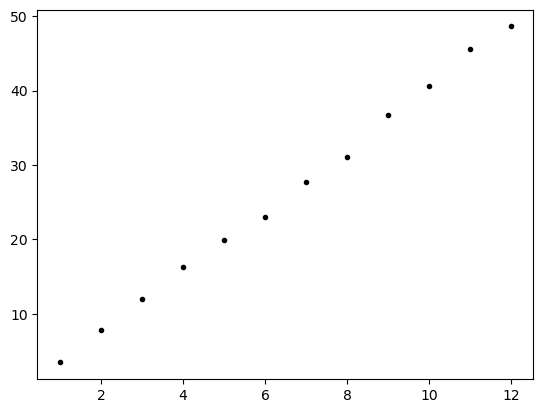

In [9]:
plt.plot(data_in, data_out, 'k.');

## Training

***

In [10]:
# An index in the data set.
i = 5

In [11]:
# Actual input/output pair from the real world.
data_in[i], data_out[i]

(6.0, 23.01996605714691)

In [12]:
# Initial weights.
w =  np.array([0.0, 1.0])

# What the neuron currently outputs for the real-world input, based on current weights.
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

6.0

In [13]:
# The goal is to create an algorithm that updates w to move the output towards the real output.
# Initial weights.
w =  np.array([0.0, 4.0])

# What the neuron could output for the real-world input, based on better weights.
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

24.0

## Cost

***

In [14]:
# Usually use sum of squares.
def cost(w, x, phi, y):
    pred = fire_neuron(x, w, phi)
    return (y - pred)**2

In [15]:
# An index in the data set.
i = 5

In [16]:
# Cost of initial w.
w = np.array([0.0, 1.0])

cost(w, data_in[i], identity, data_out[i])

289.6792445864329

In [17]:
# Cost of a "better" w.
w = np.array([0.0, 4.0])

cost(w, data_in[i], identity, data_out[i])

0.9604665291441745

## Training

***

In [18]:
# Hyperparameter.
learning_rate = 0.001

In [19]:
def train_neuron(x, y, w, phi):
    # The possible adjustment to the weights.
    adjust = np.array([0.0, learning_rate])
    # Calculate the current cost.
    current = cost(w, x, phi, y)
    # Calculate the cost with slight adjustment to the weights.
    adding = cost(w + adjust, x, phi, y)
    # If the adjusted weights lower the cost, update the weights.
    if adding < current:
        w = w + adjust
    # Otherwise move in the other direction.
    else:
        w = w - adjust
    return w

In [20]:
# Set some initial weights.
w = np.array([0.0, 1.0])

In [21]:
# The training values.
data_in[i], data_out[i]

(6.0, 23.01996605714691)

In [22]:
# Current neuron output for data_in[i].
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

6.0

In [23]:
# Nudge the weights towards better values.
w_improved = train_neuron(data_in[i], data_out[i], w, identity)
w_improved

array([0.   , 1.001])

In [24]:
# Current neuron output for data_in[i].
fire_neuron(np.array([1.0, data_in[i]]), w_improved, identity)

6.005999999999999

In [25]:
# Set some initial weights.
w = np.array([0.0, 1.0])

# Loop several times.
for epoch in range(10000):
    for i in range(len(data_in)):
        w = train_neuron(data_in[i], data_out[i], w, identity)

# Show w.
w

array([0.   , 3.982])

## Using keras

***

https://github.com/keras-team/keras

In [26]:
# Create a new sequential neural network.
model = keras.Sequential()

In [27]:
# Add a dense layer with 64 neurons and use the relu activation function.
model.add(keras.layers.Dense(units=64, activation='relu'))

In [28]:
# Add a dense layer with 10 neurons and the softmax activation function.
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [29]:
# Compile the neural network.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [30]:
# Create a fake training data set.
x_train = np.random.normal(0.0, 1.0, (100, 64))
y_train = np.random.normal(0.5, 0.1, (100, 10))

In [31]:
# Train the neural network.
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
4/4 [==============================] - 0s 2ms/step - loss: 13.1802 - accuracy: 0.0600
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 13.1051 - accuracy: 0.0600
Epoch 3/5
4/4 [==============================] - 0s 2ms/step - loss: 13.0393 - accuracy: 0.0600
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 12.9874 - accuracy: 0.0600
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 12.9444 - accuracy: 0.0600


In [32]:
# Create a fake training data set.
x_test = np.random.normal(0.0, 1.0, (10, 64))
y_test = np.random.normal(0.5, 0.1, (10, 10))

In [33]:
# Evaluate the network.
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

1/1 [==============================] - 0s 206ms/step - loss: 13.4258 - accuracy: 0.2000


In [34]:
# Make predictions for the test set.
classes = model.predict(x_test, batch_size=128)

1/1 [==============================] - 0s 128ms/step


In [35]:
classes

array([[0.10855036, 0.11463435, 0.12642533, 0.07285412, 0.14525129,
        0.00846554, 0.3534727 , 0.03628501, 0.00769375, 0.02636751],
       [0.11642224, 0.03666467, 0.1536713 , 0.03745162, 0.06945257,
        0.04037153, 0.36238036, 0.02465042, 0.06692749, 0.09200781],
       [0.01376091, 0.04763785, 0.01333042, 0.0923672 , 0.04160661,
        0.03203782, 0.17181174, 0.42576447, 0.13436472, 0.0273183 ],
       [0.06953759, 0.04741861, 0.02328054, 0.06441845, 0.08848558,
        0.02792156, 0.1274992 , 0.39185888, 0.09970006, 0.05987946],
       [0.07752084, 0.02367885, 0.20723696, 0.06652207, 0.06498934,
        0.0987652 , 0.15078083, 0.14409979, 0.09714879, 0.06925733],
       [0.1242262 , 0.05483727, 0.03947407, 0.11738381, 0.02307425,
        0.03696149, 0.11130671, 0.26293805, 0.08207215, 0.1477261 ],
       [0.03046251, 0.10839507, 0.18898965, 0.0806688 , 0.0839829 ,
        0.06398778, 0.2794679 , 0.06627617, 0.05221198, 0.04555725],
       [0.15212704, 0.01614945, 0.4365164

## Single Neuron in keras

***

In [36]:
# Create a new sequential neural network.
model = keras.Sequential()

In [37]:
# Add a dense layer with 1 neuron and the identity activation function.
model.add(keras.layers.Dense(units=1))

In [38]:
# Compile the neural network.
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [39]:
# Real-world input values.
data_in = np.arange(1.0, 13.0, 0.01)

# https://stackoverflow.com/a/47468541
data_in = data_in.reshape(-1, 1)

data_in

array([[ 1.  ],
       [ 1.01],
       [ 1.02],
       ...,
       [12.97],
       [12.98],
       [12.99]])

In [40]:
# Real-world output values.
data_out = 4.0 * data_in + np.random.normal(0.0, 1.0, data_in.shape)

data_out

array([[ 3.40763906],
       [ 0.78115864],
       [ 4.25095666],
       ...,
       [52.2468814 ],
       [52.92620189],
       [52.07229795]])

In [41]:
# Train the neural network.
model.fit(data_in, data_out, epochs=5, batch_size=32)

Epoch 1/5
38/38 [==============================] - 0s 802us/step - loss: 26.1156 - accuracy: 0.0000e+00
Epoch 2/5
38/38 [==============================] - 0s 943us/step - loss: 1.0510 - accuracy: 0.0000e+00
Epoch 3/5
38/38 [==============================] - 0s 970us/step - loss: 1.0708 - accuracy: 0.0000e+00
Epoch 4/5
38/38 [==============================] - 0s 890us/step - loss: 1.1236 - accuracy: 0.0000e+00
Epoch 5/5
38/38 [==============================] - 0s 944us/step - loss: 1.0684 - accuracy: 0.0000e+00


In [42]:
# Test input values.
data_test = np.linspace(-10.0, 20.0, 1001).reshape(-1, 1)

# Feed test values into neural network.
preds = model.predict(data_test)

32/32 [==============================] - 0s 869us/step


In [43]:
data_test.flatten()[0]

-10.0

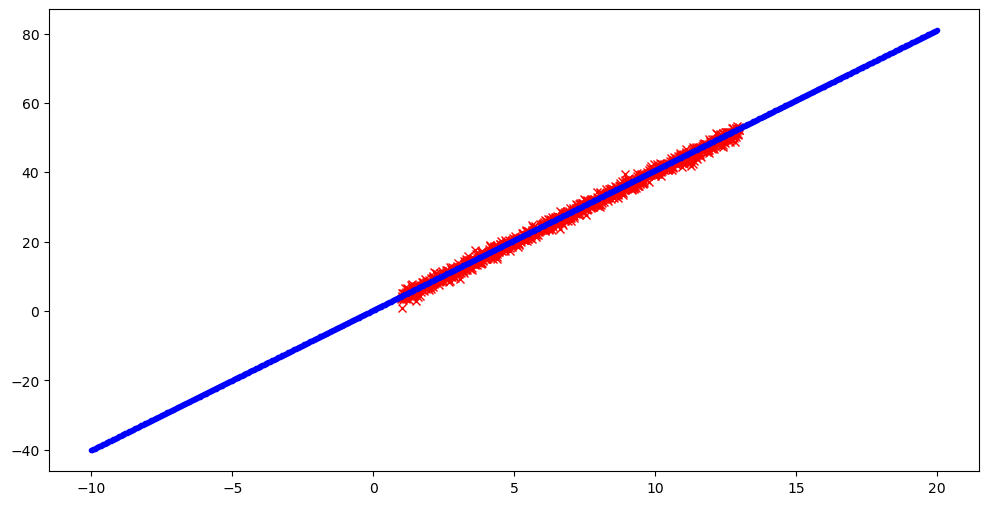

In [44]:
# Plot the values.
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the original data set.
ax.plot(data_in.flatten(), data_out.flatten(), 'rx', label='Training')

# Plot the predicted data set.
ax.plot(data_test.flatten(), preds.flatten(), 'b.', label='Predictions');

***

## End